# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - CONTAGEM_CP_MUN

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp+cs-cs.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO
0,2023,4644301,7885
1,2023,4637104,1569
2,2023,4647801,1219
3,2023,4647801,1219
4,2023,4647801,1219
...,...,...,...
85176660,1903,9430800,921
85176661,1901,9430800,8927
85176662,1901,9430800,8927
85176663,1901,6912500,6645


In [2]:
# CONTAGEM_CP_MUN
# criando a coluna contagem para o ranking: 
# CONTAGEM_CP_MUN = total de CNAE_FISCAL_PRINCIPAL em cada município
# pilhagem com repetição -> mesmos cnaes abertos + de 1x

df['CONTAGEM_CP_MUN'] = df.groupby('MUNICÍPIO')['CNAE_FISCAL_PRINCIPAL'].transform('count')

# ordenando a coluna contagem para o ranking:

df = df.sort_values('CONTAGEM_CP_MUN', ascending=False)
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_MUN
21750218,2020,161003,7107,6576067
72762142,2007,4651602,7107,6576067
72762193,2007,4614100,7107,6576067
13383037,2021,4721104,7107,6576067
13383038,2021,4721104,7107,6576067
...,...,...,...,...
59406900,2012,8599604,390,151
59406901,2012,8599604,390,151
59406902,2012,8599604,390,151
59406903,2012,8599604,390,151


In [3]:
# EXCLUINDO AS INFORMAÇÕES NÃO NECESSÁRIAS AO MODELO:
df = df.drop(['DATA_DE_INÍCIO_ATIVIDADE'], axis=1)
df

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_MUN
21750218,161003,7107,6576067
72762142,4651602,7107,6576067
72762193,4614100,7107,6576067
13383037,4721104,7107,6576067
13383038,4721104,7107,6576067
...,...,...,...
59406900,8599604,390,151
59406901,8599604,390,151
59406902,8599604,390,151
59406903,8599604,390,151


In [4]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'MUNICÍPIO', 'CONTAGEM_CP_MUN']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_MUN
21750218,161003,7107,6576067
72762142,4651602,7107,6576067
72762193,4614100,7107,6576067
13383037,4721104,7107,6576067
13383038,4721104,7107,6576067
...,...,...,...
59406900,8599604,390,151
59406901,8599604,390,151
59406902,8599604,390,151
59406903,8599604,390,151


In [5]:
# Realize a amostragem aleatória simples com 0,001% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_MUN
18961261,9200399,255,1376804
55763281,4772500,3849,1006375
44023722,4753900,1389,1032536
80544391,4120400,3993,66047
30464949,5229099,6477,504071
...,...,...,...
66158533,4751201,921,575227
59148703,4753900,213,13459
59296316,7490103,8591,25436
56395681,1623400,6717,37896


In [6]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["CONTAGEM_CP_MUN", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL"]).size().reset_index(name="Contagem")

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 12


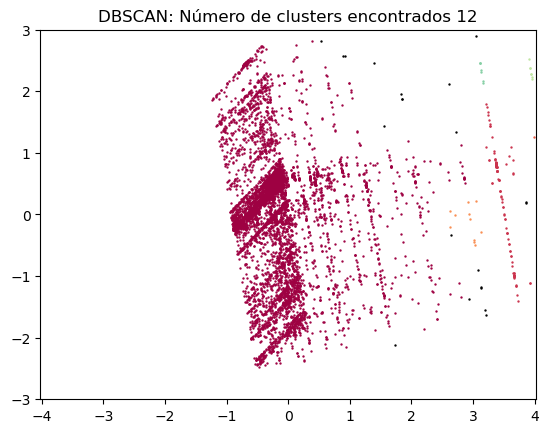

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()


# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - CONTAGEM_CP_MUN

Tendo em vista a utilização de apenas 0,001% dos dados devido às limitações de poder computacional existentes, o gráfico apresentado possui distribuição irregular e concentrada próximo à origem. Os 5 clusters encontrados não apresentaram resultados conclusivos ao formato dos dados. O posicionamento dos dados indica uma curva de crescimento diretamente proporcional.